In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
file = 'Fish.csv'
df = pd.read_csv(file)


# Part 1: Data Description

## (1)

In [3]:
print('共有7种不同的鱼类品种，品种名称和各品种数量如下所示：')
df['Species'].value_counts()

共有7种不同的鱼类品种，品种名称和各品种数量如下所示：


Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

## (2)

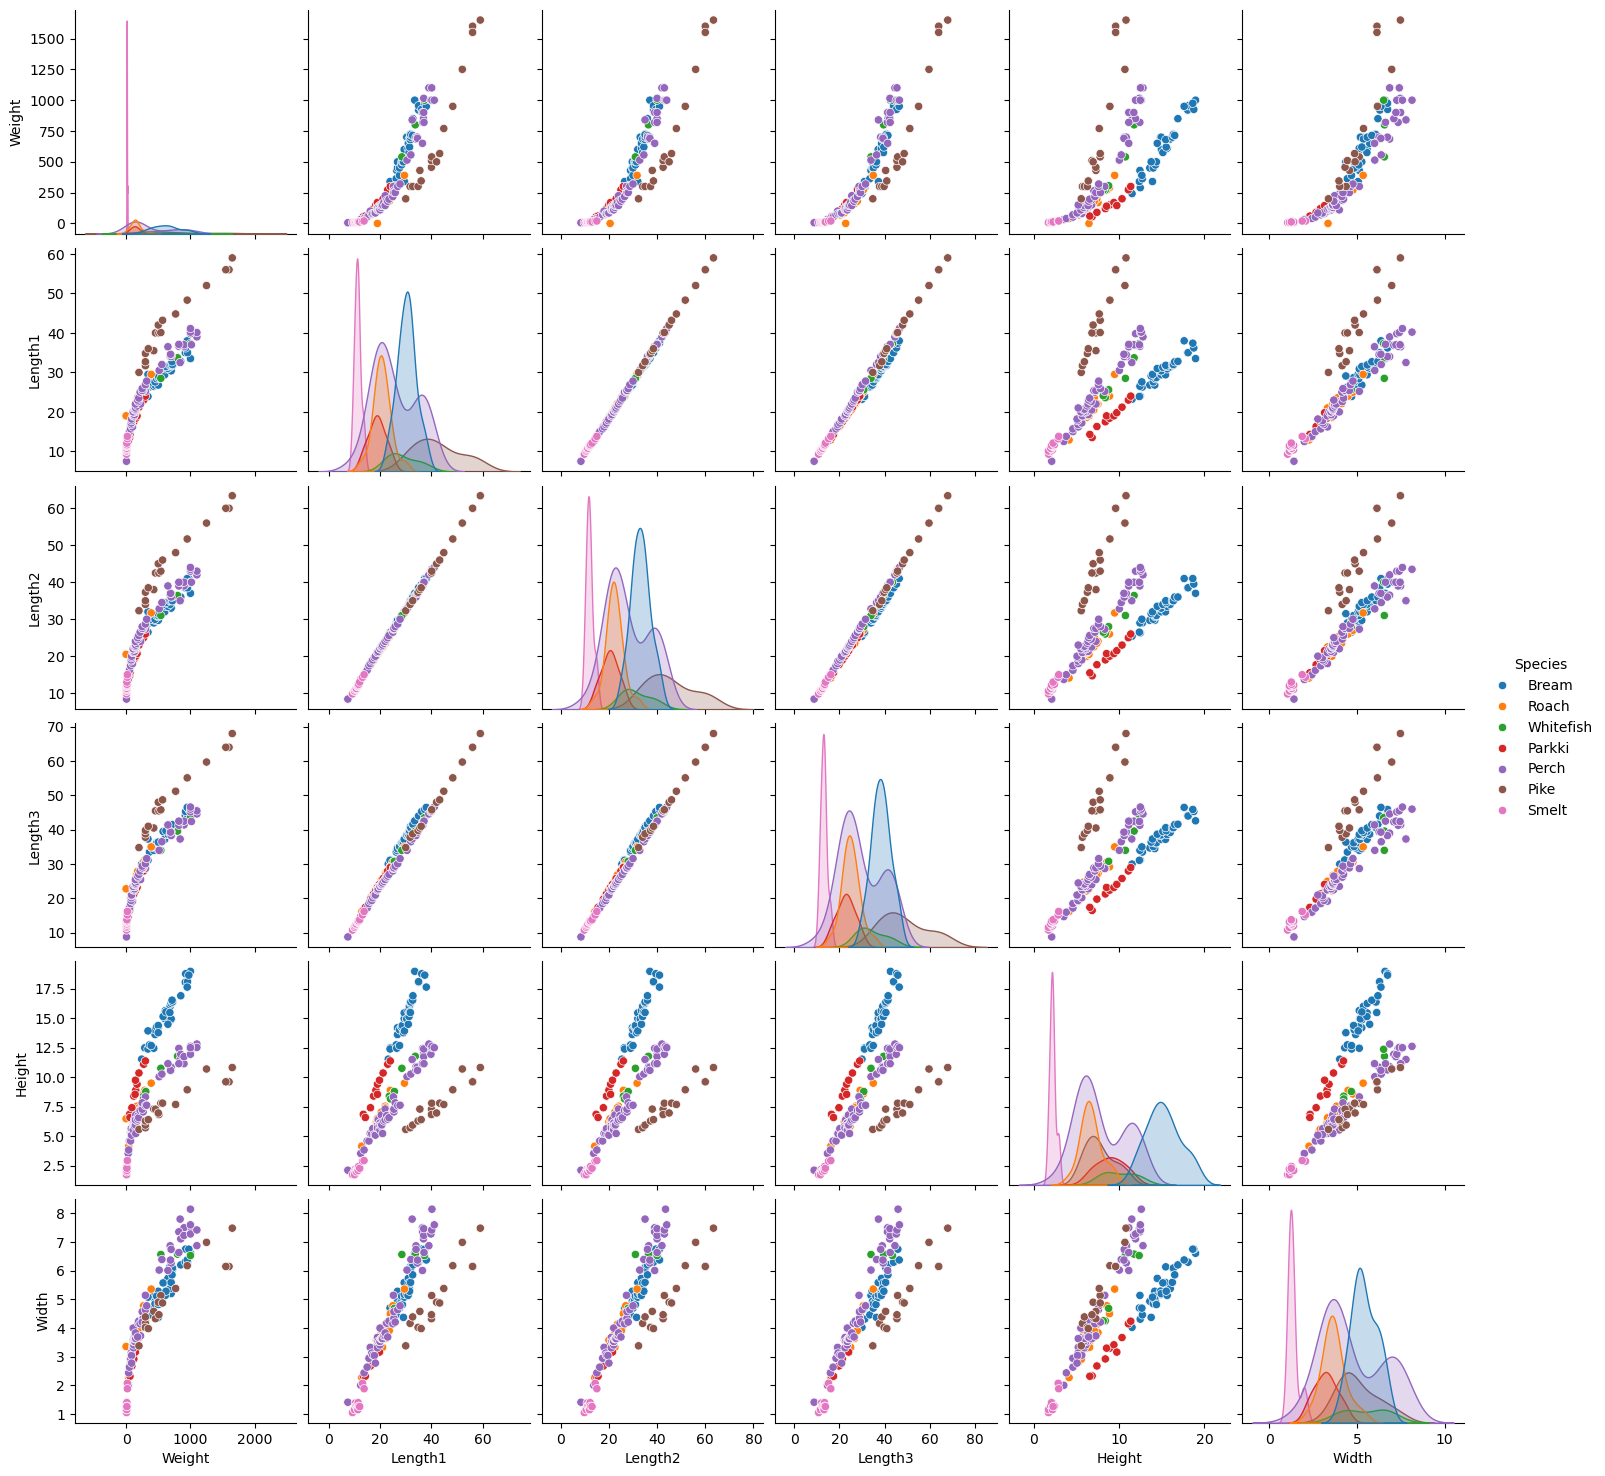

In [4]:
sns.pairplot(df, hue='Species')
plt.show()

- 由上图可知，对于各种类的鱼，各变量间均呈现一定的正相关关系

## (3)

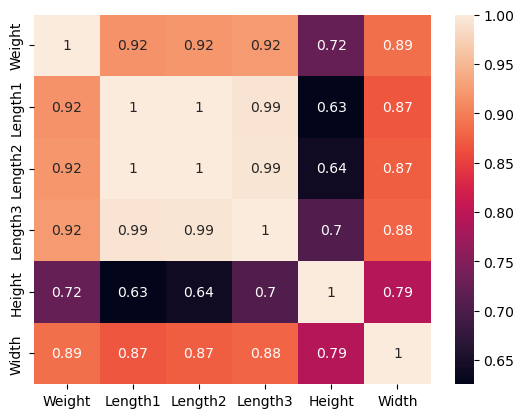

In [5]:
df_withoutSpecies = df.drop(columns='Species')
sns.heatmap(df_withoutSpecies.corr(), annot=True)
plt.show()

- 上述相关矩阵中各相关系数均在0.6以上，各变量间存在较强相关性

## (4)

In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


从上述描述统计结果看出，Weight的平均值和标准差均远大于各自变量，其数据跨度过大，而Height与Width的平均值和标准差均远小于其它自变量，其数据跨度过小。这会导致在回归模型的训练过程中Height与Width的权重过小，同时自变量与因变量的权重不匹配。所以在回归模型训练过程中应对数据进行标准化以消除数据跨度不同带来的权重差异。

同时，基于之前的相关矩阵知各自变量间存在较强的线性相关关系，可能导致多重共线性问题。这可能导致某些自变量的回归系数不显著。

在下方的箱线图中能更显示出这种跨度差异：

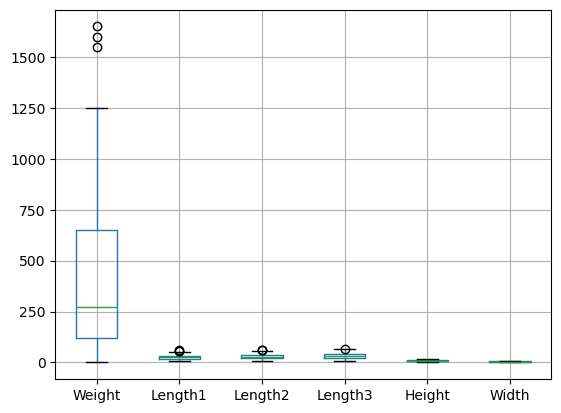

In [7]:
df.boxplot() # 绘制包含除 Species 外所有自变量的箱线图
plt.show()

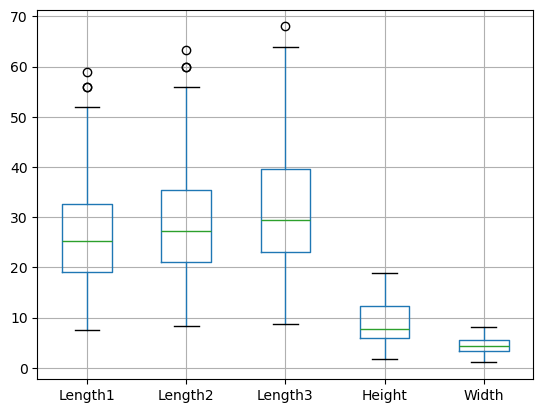

In [8]:
df_target = df.drop(columns='Weight')
df_target.boxplot()
plt.show()

# Part 2: Multiple Linear Regression

## (1)

In [9]:
df = df[df['Weight'] > 0]
df_X = df.drop(columns='Weight')

X = pd.get_dummies(df_X, columns=['Species'], drop_first=True) # 对 Species 进行独热编码
X = X.astype(float) # 将独热编码后以布尔值保存的数据转换为数值型数据
X = sm.add_constant(X)
y = df['Weight']

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     193.6
Date:                Tue, 13 May 2025   Prob (F-statistic):           3.46e-81
Time:                        15:44:53   Log-Likelihood:                -935.71
No. Observations:                 158   AIC:                             1895.
Df Residuals:                     146   BIC:                             1932.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -912.7110    127.460     -7.161      0.000   -1164.615    -660.807
Length1             -79.8443     36.332     -2.198      0.030    -151.649      -8.039
Length2              81.7091     45.840      1.783      0.077      -8.886     172.304
Length3              30.2726     29.484      1.027      0.306     -27.997      88.543
Height                5.8069     13.093      0.444      0.658     -20.070      31.683
Width                -0.7819     23.948     -0.033      0.974     -48.111      46.547
Species_Parkki      160.9212     75.959      2.119      0.036      10.800     311.043
Species_Perch       133.5542    120.608      1.107      0.270    -104.810     371.918
Species_Pike       -209.0262    135.491     -1.543      0.125    -476.803      58.751
Species_Roach       104.9243     91.464      1.147      0.253     -75.840     285.688
Species_Smelt       442.2125    119.694      3.695      0.000     205.655     678.770
Species_Whitefish    91.5688     96.834      0.946      0.346     -99.808     282.946
==============================================================================
Omnibus:                       43.200   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.476
Skew:                           1.180   Prob(JB):                     1.12e-21
Kurtosis:                       6.014   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## (2)

$R^2=0.936$, $adj R^2=0.931$，模型是显著的，但是在5%的显著性水平下有些回归系数并不显著，这与Part1 (4)中回答一致，可能是由于自变量间多重共线性的问题导致一些回归系数不显著。

## (3)

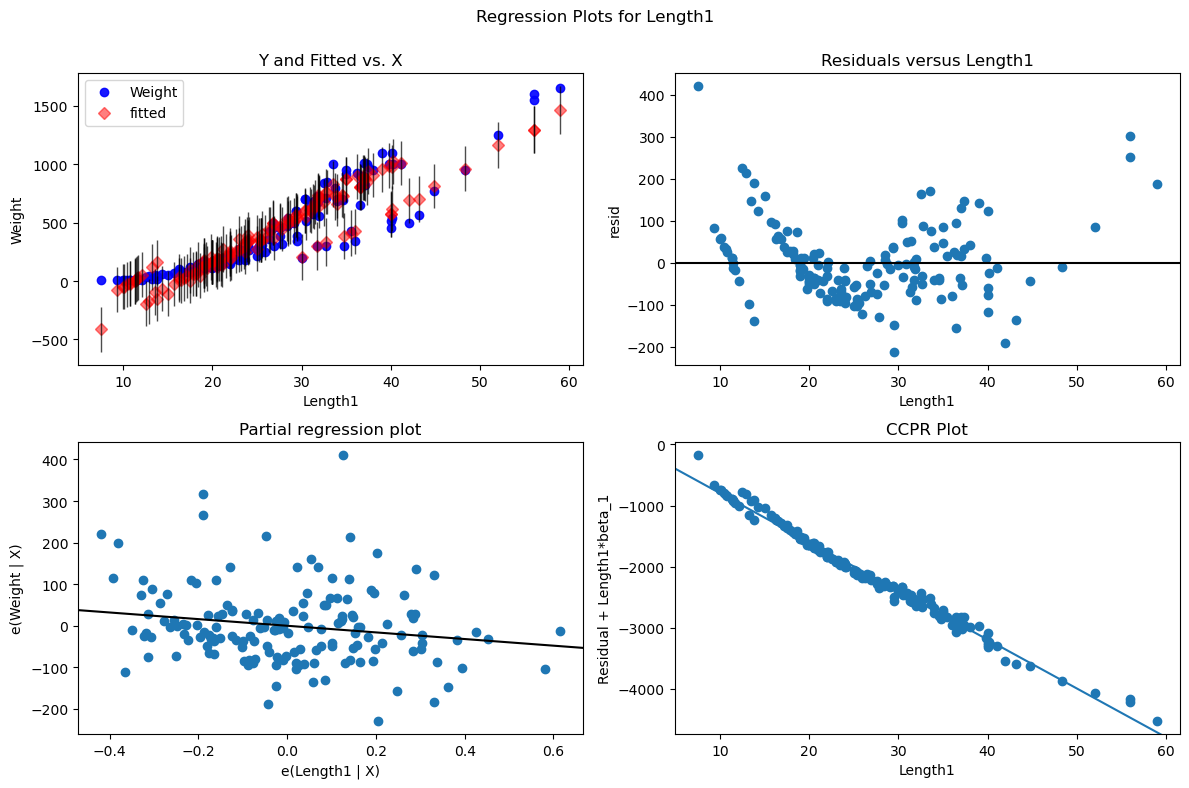

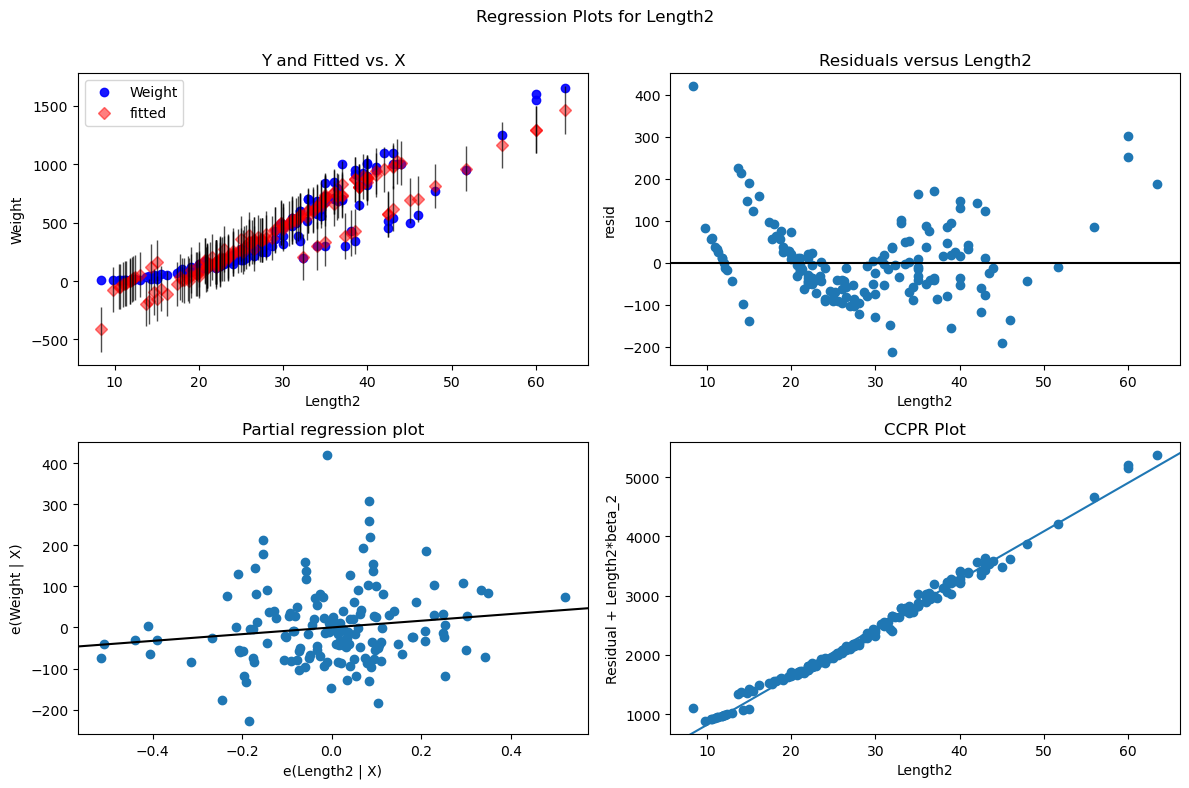

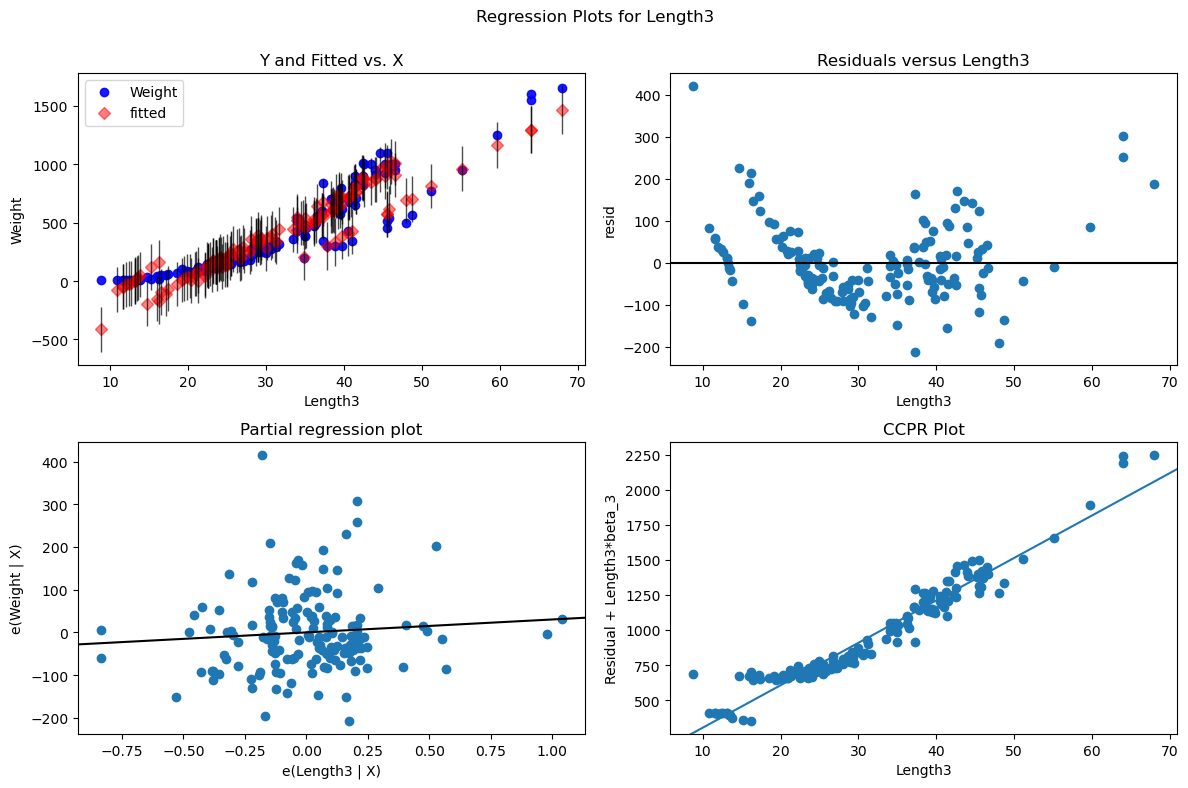

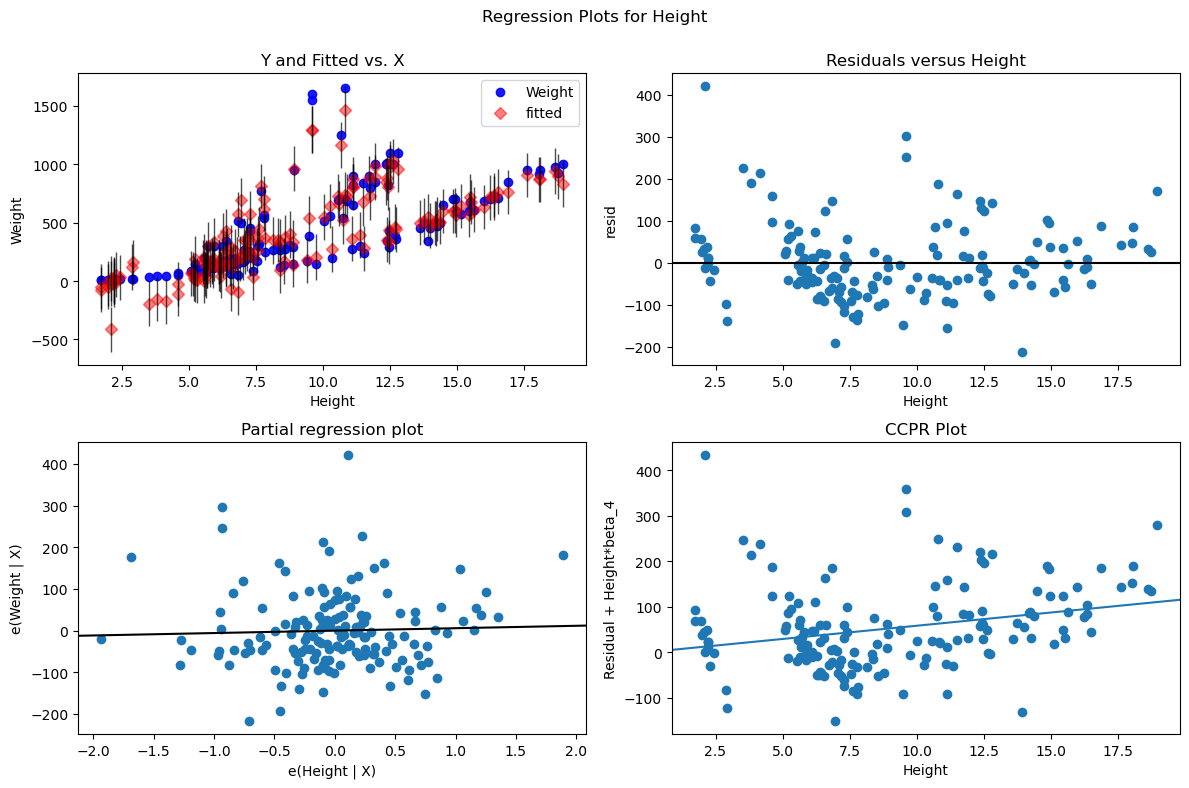

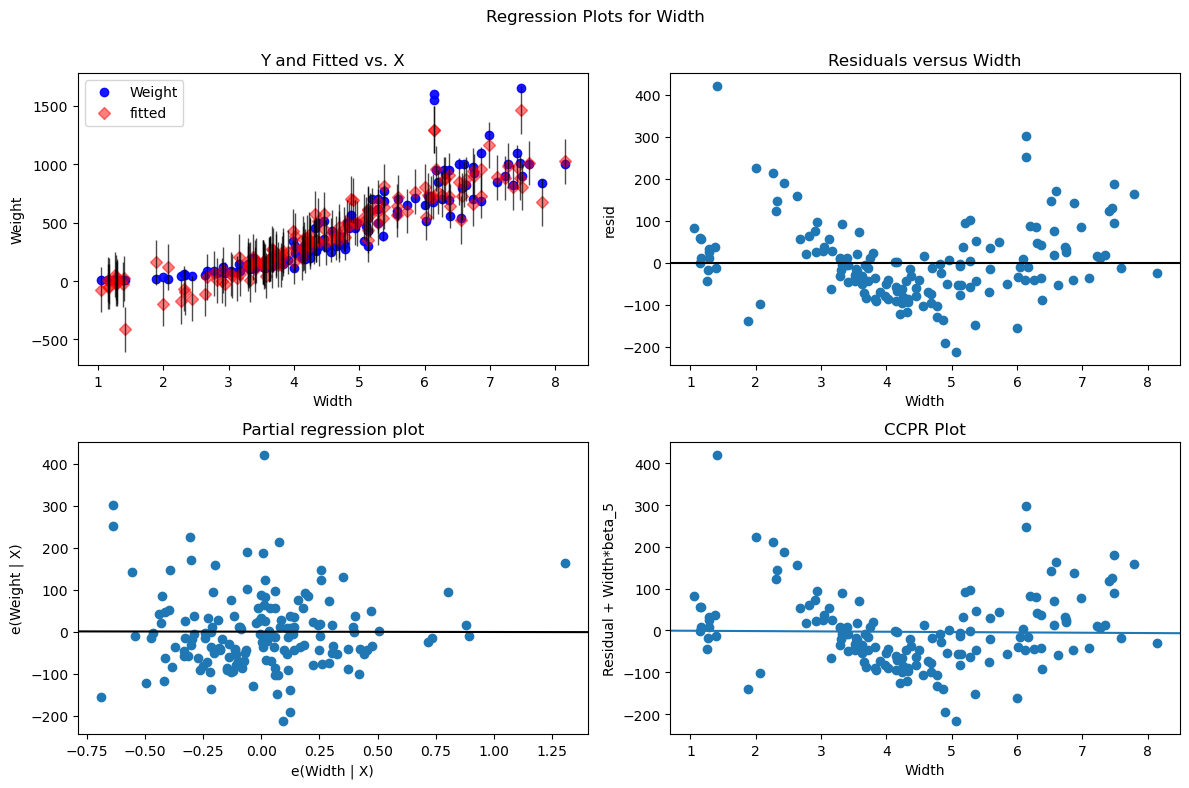

In [10]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'Length1', fig=fig)
plt.show()

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'Length2', fig=fig)
plt.show()

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'Length3', fig=fig)
plt.show()

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'Height', fig=fig)
plt.show()

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'Width', fig=fig)
plt.show()

从上述偏回归图与成分偏差图中得出 Height 和 Width 与因变量 Weight 间并不呈线性关系，但从Part1 (2)的 Pairplot 中知晓其间应存在一定的线性关系，可能是由于自变量间存在的多重共线性导致在偏回归图与成分偏差图中未反映出这种线性关系，这与Part1 (4)中的分析一致。

## (4)

### 4-1

In [11]:
df['Length'] = df['Length1'] + df['Length2'] + df['Length3']
df['Area'] = df['Height'] * df['Width']

df2 = df.drop(columns=['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'])
X2 = pd.get_dummies(df2, columns=['Species'], drop_first=True)
X2 = X2.astype(float)
X2 = sm.add_constant(X2)
y2 = df['Weight']

model2 = sm.OLS(y2, X2).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.50e-88
Time:                        15:44:55   Log-Likelihood:                -927.07
No. Observations:                 158   AIC:                             1872.
Df Residuals:                     149   BIC:                             1900.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -664.2753     41.396    -16.047      0.000    -746.075    -582.476
Length                9.1033      0.904     10.073      0.000       7.317      10.889
Area                  4.2501      0.833      5.104      0.000       2.605       5.895
Species_Parkki      129.3482     35.432      3.651      0.000      59.334     199.362
Species_Perch       109.5875     27.642      3.964      0.000      54.966     164.209
Species_Pike        -35.3216     70.772     -0.499      0.618    -175.168     104.525
Species_Roach        95.4021     34.447      2.770      0.006      27.335     163.469
Species_Smelt       332.8550     38.150      8.725      0.000     257.470     408.240
Species_Whitefish    94.9735     42.308      2.245      0.026      11.373     178.574
==============================================================================
Omnibus:                       68.902   Durbin-Watson:                   0.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.587
Skew:                           1.632   Prob(JB):                     2.88e-59
Kurtosis:                       8.504   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4-2

$R^2=0.942$, $adj R^2=0.939$，模型是显著的，在5%的显著性水平下 Species_Pike 的回归系数不显著，其它自变量的回归系数均为显著。这说明进行变量转换在一定程度上可以避免多重共线性的问题。

### 4-3

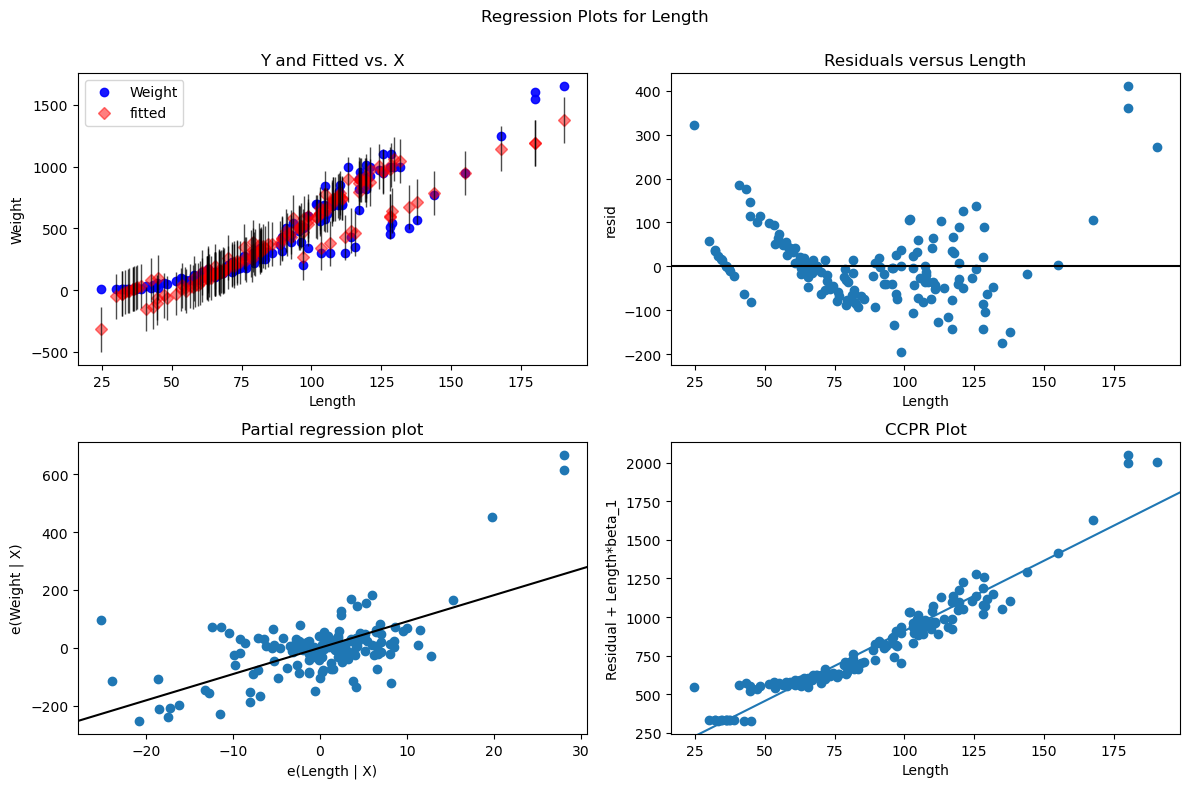

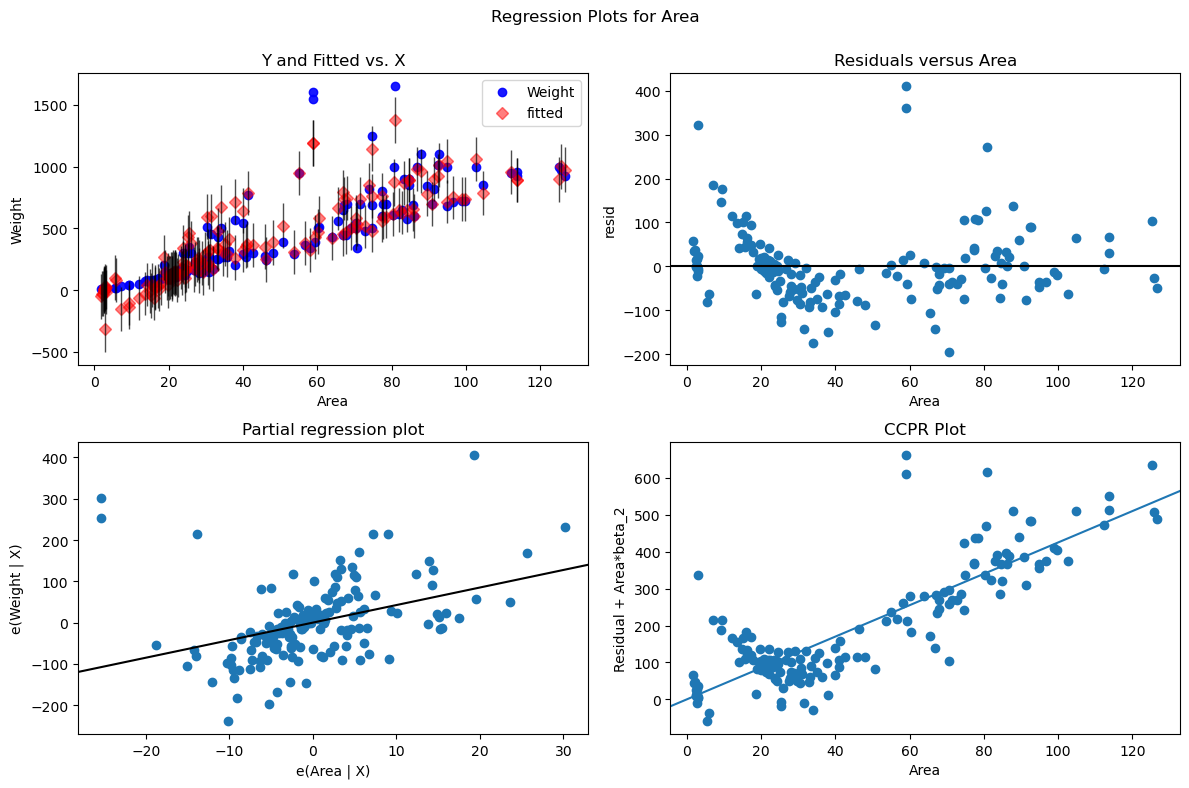

In [12]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model2, 'Length', fig=fig)
plt.show()

fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model2, 'Area', fig=fig)
plt.show()

从上述偏回归图与成分偏差图知晓 Length 与 Weight 间呈线性关系，Area 与 Weight 间也呈现线性关系，说明进行适当的变量转换可以在一定程度上避免多重共线性的问题。但是这样将多个变量转换为少数几个变量可能会丢失一些信息。

# Part 3: Model Selection

In [13]:
from hw3_helper_function import *

## (1)

In [14]:
file = 'Fish.csv'
df = pd.read_csv(file)

In [15]:
df = df[df['Weight'] > 0]
df_X = df.drop(columns='Weight')

X = pd.get_dummies(df_X, columns=['Species'], drop_first=True) # 对 Species 进行独热编码
X = X.astype(float) # 将独热编码后以布尔值保存的数据转换为数值型数据
y = df['Weight']

df_results = best_subset(y, X)
df_results

ModuleNotFoundError: No module named 'tqdm'

## (2)

In [ ]:
idx_max_rsqr = df_results.groupby('numb_features')['R_squared'].idxmax()
df_maxRsqr = df_results.loc[idx_max_rsqr]
df_maxRsqr

,numb_features,RSS,R_squared,features,adj_R_squared,AIC,BIC
2,1,2.971070e+06,0.852096,"(Length3,)",0.851148,2007.394919,2013.520109
17,2,1.994105e+06,0.900730,"(Length1, Species_Pike)",0.899450,1946.396121,1955.583907
142,3,1.410634e+06,0.929777,"(Length2, Species_Pike, Species_Smelt)",0.928409,1893.703386,1905.953766
262,4,1.363041e+06,0.932146,"(Length1, Length2, Species_Pike, Species_Smelt)",0.930372,1890.280734,1905.593710
630,5,1.306495e+06,0.934961,"(Length1, Length2, Species_Parkki, Species_Pik...",0.932821,1885.586194,1903.961765
1140,6,1.303414e+06,0.935114,"(Length1, Length2, Species_Parkki, Species_Pik...",0.932536,1887.213228,1908.651393
1596,7,1.300819e+06,0.935243,"(Length1, Length2, Width, Species_Parkki, Spec...",0.932221,1888.898321,1913.399081
1865,8,1.299444e+06,0.935312,"(Length1, Length2, Length3, Species_Parkki, Sp...",0.931839,1890.731247,1918.294602
2007,9,1.291204e+06,0.935722,"(Length1, Length2, Length3, Species_Parkki, Sp...",0.931813,1891.726090,1922.352041
2041,10,1.288793e+06,0.935842,"(Length1, Length2, Length3, Height, Species_Pa...",0.931477,1893.430801,1927.119347


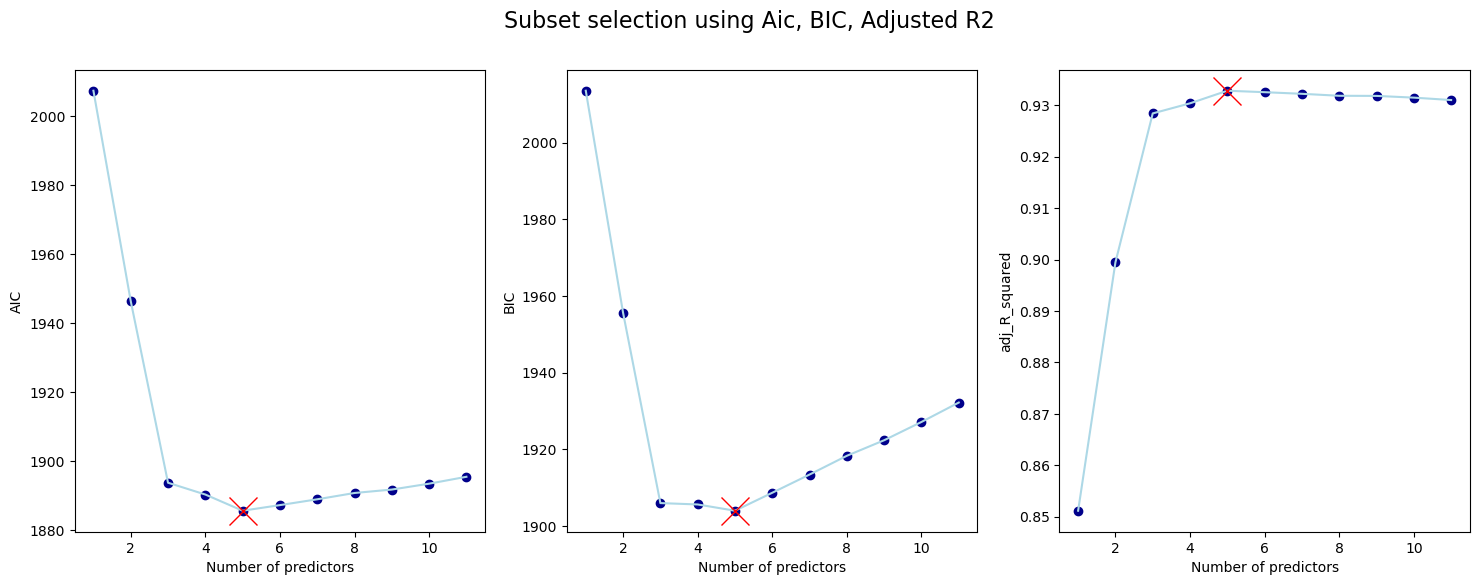

In [ ]:
standards = ['AIC', 'BIC', 'adj_R_squared']
df_maxRsqr.index = df_maxRsqr.numb_features

fig = plt.figure(figsize=(18, 6))

for i, v in enumerate(standards):
    ax = fig.add_subplot(1, len(standards), i+1)
    ax.plot(df_maxRsqr['numb_features'], df_maxRsqr[v], color='lightblue')
    ax.scatter(df_maxRsqr['numb_features'], df_maxRsqr[v], color='darkblue')
    if v == 'adj_R_squared':
        ax.plot(df_maxRsqr[v].idxmax(), df_maxRsqr[v].max(), marker='x', markersize=20, color='r')
    else:
        ax.plot(df_maxRsqr[v].idxmin(), df_maxRsqr[v].min(), marker='x', markersize=20, color='r')
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using Aic, BIC, Adjusted R2', fontsize=16)
plt.show()

AIC 和 BIC 选择的变量为 Length1, Length2, Species_Parkki, Species_Pike, Species_Smelt

## (3)

In [ ]:
remaining_features = list(X.columns.values)
df_results_forward_stepwise = forward_stepwise(y, X, remaining_features)
df_results_forward_stepwise

,features,RSS,R_squared,AIC,BIC,adj_R_squared,numb_features
1,[Length3],2.971070e+06,0.852096,2007.394919,2013.520109,0.851148,1
2,"[Length3, Species_Pike]",2.147463e+06,0.893096,1958.102583,1967.290368,0.891717,2
3,"[Length3, Species_Pike, Species_Smelt]",1.548136e+06,0.922931,1908.399436,1920.649816,0.921430,3
4,"[Length3, Species_Pike, Species_Smelt, Length2]",1.388918e+06,0.930858,1893.252219,1908.565194,0.929050,4
5,"[Length3, Species_Pike, Species_Smelt, Length2...",1.345715e+06,0.933008,1890.259400,1908.634970,0.930805,5
6,"[Length3, Species_Pike, Species_Smelt, Length2...",1.305040e+06,0.935033,1887.410210,1908.848376,0.932452,6
7,"[Length3, Species_Pike, Species_Smelt, Length2...",1.302412e+06,0.935164,1889.091606,1913.592366,0.932138,7
8,"[Length3, Species_Pike, Species_Smelt, Length2...",1.300050e+06,0.935282,1890.804866,1918.368222,0.931807,8
9,"[Length3, Species_Pike, Species_Smelt, Length2...",1.296898e+06,0.935438,1892.421364,1923.047314,0.931512,9
10,"[Length3, Species_Pike, Species_Smelt, Length2...",1.290520e+06,0.935756,1893.642368,1927.330914,0.931386,10


## (4)

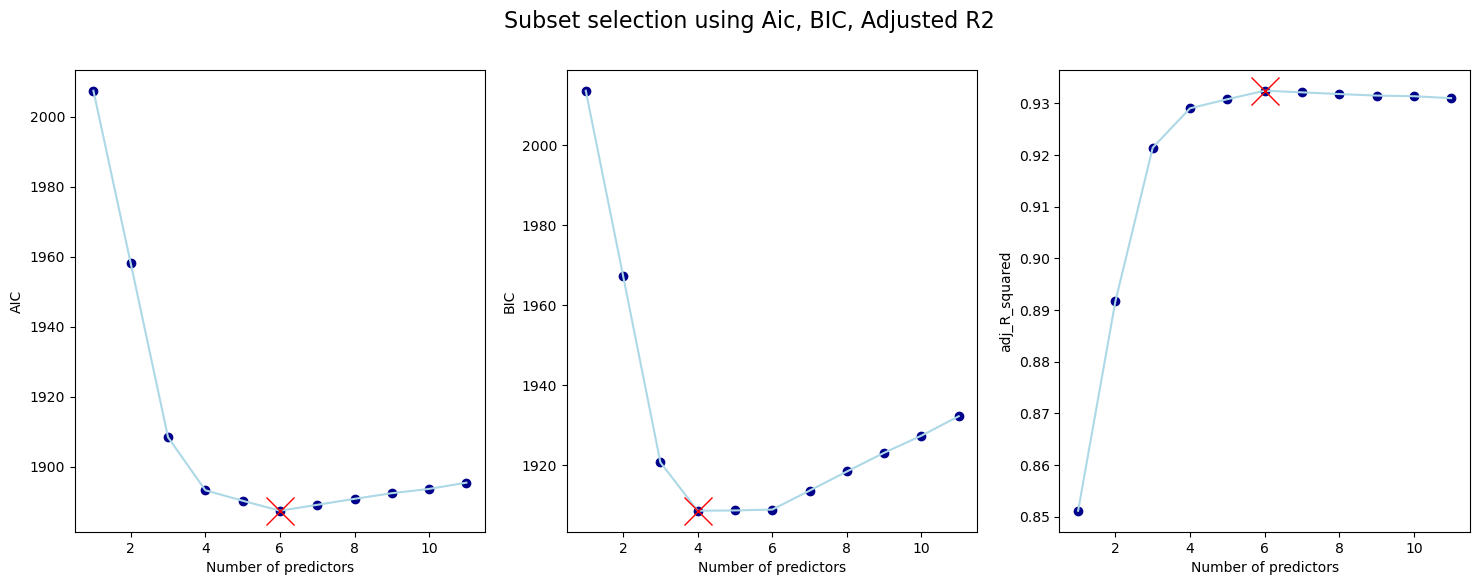

In [ ]:
standards = ['AIC', 'BIC', 'adj_R_squared']
df_results_forward_stepwise.index = df_results_forward_stepwise.numb_features

fig = plt.figure(figsize=(18, 6))

for i, v in enumerate(standards):
    ax = fig.add_subplot(1, len(standards), i+1)
    ax.plot(df_results_forward_stepwise['numb_features'], df_results_forward_stepwise[v], color='lightblue')
    ax.scatter(df_results_forward_stepwise['numb_features'], df_results_forward_stepwise[v], color='darkblue')
    if v == 'adj_R_squared':
        ax.plot(df_results_forward_stepwise[v].idxmax(), df_results_forward_stepwise[v].max(), marker='x', markersize=20, color='r')
    else:
        ax.plot(df_results_forward_stepwise[v].idxmin(), df_results_forward_stepwise[v].min(), marker='x', markersize=20, color='r')
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using Aic, BIC, Adjusted R2', fontsize=16)
plt.show()

AIC 选择变量为 Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1  
BIC 选择变量为 Length3, Species_Pike, Species_Smelt, Length2

## (5)

In [ ]:
def backward_stepwise(y, X):
    # Left for you to complete
    features = list(X.columns.values)
    dropped_features = []
    RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list = [], [], [], [], []
    features_list = dict()

    p = len(features)

    for i in range(p, 0, -1):
        best_RSS = np.inf

        for f in itertools.combinations(features, i):
            X_c = sm.add_constant(X[list(f)])
            model = sm.OLS(y, X_c).fit()

            if model.ssr < best_RSS:
                best_RSS = model.ssr
                best_R_squared = model.rsquared
                features = list(f)
                best_aic = model.aic
                best_bic = model.bic
                best_adj_R_squared = model.rsquared_adj

        RSS_list.append(best_RSS)
        R_squared_list.append(best_R_squared)
        AIC_list.append(best_aic)
        BIC_list.append(best_bic)
        adj_R_squared_list.append(best_adj_R_squared)

        features_list[p + 1 - i] = features.copy()

    df_results = pd.DataFrame({
        'numb_features': range(p, 0, -1),
        'features': list(features_list.values()),
        'RSS': RSS_list,
        'R_squared': R_squared_list,
        'AIC': AIC_list,
        'BIC': BIC_list,
        'adj_R_squared': adj_R_squared_list
    })

    df_results.index += 1

    return df_results

In [ ]:
df_results_backward_stepwise = backward_stepwise(y, X)
df_results_backward_stepwise

,numb_features,features,RSS,R_squared,AIC,BIC,adj_R_squared
1,11,"[Length1, Length2, Length3, Height, Width, Spe...",1.288784e+06,0.935842,1895.429648,1932.180788,0.931009
2,10,"[Length1, Length2, Length3, Height, Species_Pa...",1.288793e+06,0.935842,1893.430801,1927.119347,0.931477
3,9,"[Length1, Length2, Length3, Species_Parkki, Sp...",1.291204e+06,0.935722,1891.726090,1922.352041,0.931813
4,8,"[Length1, Length2, Length3, Species_Parkki, Sp...",1.299444e+06,0.935312,1890.731247,1918.294602,0.931839
5,7,"[Length1, Length2, Length3, Species_Parkki, Sp...",1.302921e+06,0.935139,1889.153420,1913.654180,0.932112
6,6,"[Length1, Length2, Species_Parkki, Species_Pik...",1.303414e+06,0.935114,1887.213228,1908.651393,0.932536
7,5,"[Length1, Length2, Species_Parkki, Species_Pik...",1.306495e+06,0.934961,1885.586194,1903.961765,0.932821
8,4,"[Length1, Length2, Species_Pike, Species_Smelt]",1.363041e+06,0.932146,1890.280734,1905.593710,0.930372
9,3,"[Length2, Species_Pike, Species_Smelt]",1.410634e+06,0.929777,1893.703386,1905.953766,0.928409
10,2,"[Length2, Species_Pike]",2.005758e+06,0.900150,1947.316684,1956.504469,0.898862


## (6)

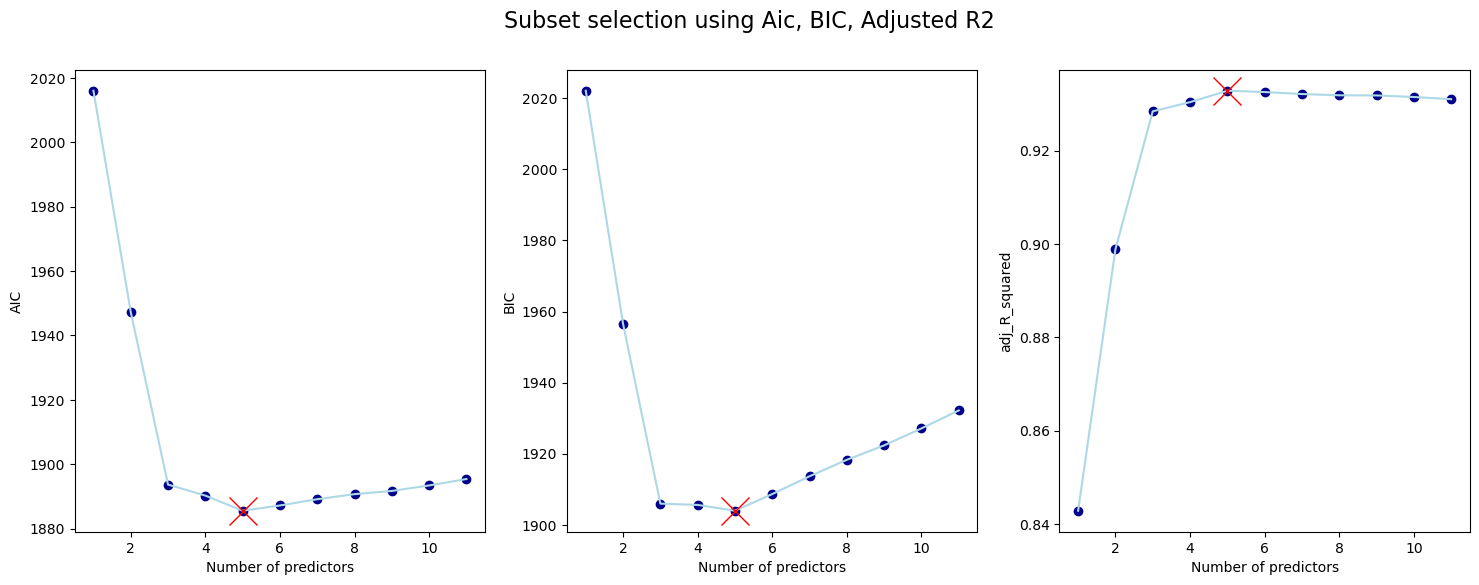

In [ ]:
standards = ['AIC', 'BIC', 'adj_R_squared']
df_results_backward_stepwise.index = df_results_backward_stepwise.numb_features

fig = plt.figure(figsize=(18, 6))

for i, v in enumerate(standards):
    ax = fig.add_subplot(1, len(standards), i+1)
    ax.plot(df_results_backward_stepwise['numb_features'], df_results_backward_stepwise[v], color='lightblue')
    ax.scatter(df_results_backward_stepwise['numb_features'], df_results_backward_stepwise[v], color='darkblue')
    if v == 'adj_R_squared':
        ax.plot(df_results_backward_stepwise[v].idxmax(), df_results_backward_stepwise[v].max(), marker='x', markersize=20, color='r')
    else:
        ax.plot(df_results_backward_stepwise[v].idxmin(), df_results_backward_stepwise[v].min(), marker='x', markersize=20, color='r')
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using Aic, BIC, Adjusted R2', fontsize=16)
plt.show()

AIC 选择变量为 Length1, Length2, Species_Parkki, Species_Pike, Species_Smelt  
BIC 选择变量为 Length1, Length2, Species_Parkki, Species_Pike, Species_Smelt

# Part 4: Lasso and Ridge, and Cross-Validation

## (1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

scaler_X.fit(X)
X_scaled = scaler_X.transform(X)

y_reshaped = y.values.reshape(-1, 1)
scaler_y.fit(y_reshaped)
y_scaled = scaler_y.transform(y_reshaped)

print("X_scaled:")
print(X_scaled)
print("y_scaled:")
print(y_scaled)


X_scaled:
[[-0.30993311 -0.28658732 -0.11046564 ... -0.36971698 -0.31180478
  -0.19867985]
 [-0.22977034 -0.20245702 -0.00693482 ... -0.36971698 -0.31180478
  -0.19867985]
 [-0.23979068 -0.1837614  -0.01556239 ... -0.36971698 -0.31180478
  -0.19867985]
 ...
 [-1.42219151 -1.4457159  -1.50813181 ... -0.36971698  3.2071349
  -0.19867985]
 [-1.31196771 -1.32419436 -1.38734584 ... -0.36971698  3.2071349
  -0.19867985]
 [-1.25184563 -1.25875968 -1.30107015 ... -0.36971698  3.2071349
  -0.19867985]]
y_scaled:
[[-0.44549491]
 [-0.31087674]
 [-0.17064948]
 [-0.10614494]
 [ 0.08175959]
 [ 0.1378505 ]
 [ 0.27807776]
 [-0.03042222]
 [ 0.1378505 ]
 [ 0.27807776]
 [ 0.20796413]
 [ 0.27807776]
 [ 0.27807776]
 [-0.17064948]
 [ 0.55853229]
 [ 0.55853229]
 [ 0.83898682]
 [ 0.83898682]
 [ 0.58657774]
 [ 0.69875955]
 [ 0.48841866]
 [ 0.79691864]
 [ 0.61462319]
 [ 0.78289591]
 [ 0.83898682]
 [ 0.90910045]
 [ 0.89507772]
 [ 0.87825045]
 [ 1.25966861]
 [ 1.68035039]
 [ 1.45598677]
 [ 1.55414586]
 [ 1.470009

## (2)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso(alpha=10 / (2 * len(y)))
model.fit(X_scaled, y_scaled)

print('model coefficient:', model.coef_)
print('intercept:', model.intercept_)
print('R^2:', model.score(X_scaled, y_scaled))

model coefficient: [ 0.00256746  0.66624258  0.          0.13301898  0.26277842  0.
  0.         -0.0328314  -0.          0.16227004  0.        ]
intercept: [-1.39509688e-16]
R^2: 0.9180559877610258


此时模型有6个非零参数

## (3)

In [ ]:
from sklearn.model_selection import GridSearchCV

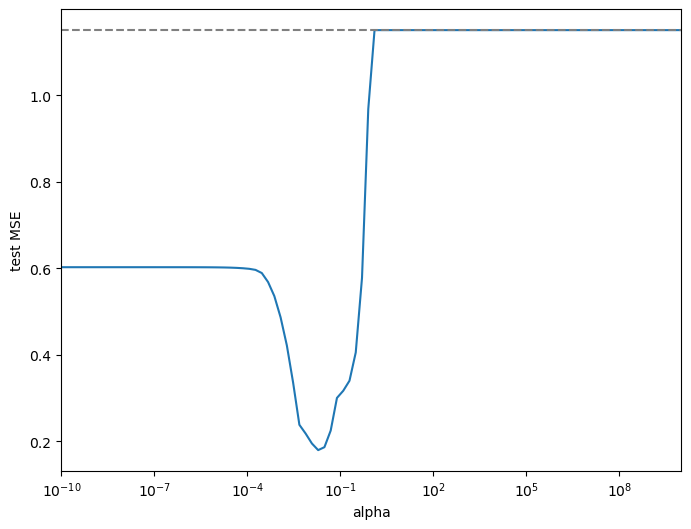

{'alpha': 0.019179102616724848}
alpha in our course: 6.060596426885052


In [ ]:
model = Lasso()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(X_scaled, y_scaled)

scores = -clf.cv_results_['mean_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

print(clf.best_params_)
print('alpha in our course:', clf.best_params_['alpha'] * 2 * len(y))

$\lambda = 6.060596426885052$

## (4)

### 4-1

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=10 / (2 * len(y)))
model.fit(X_scaled, y_scaled)

print('model coefficient:', model.coef_)
print('intercept:', model.intercept_)
print('R^2:', model.score(X_scaled, y_scaled))

model coefficient: [[-1.10786239  1.25859925  1.02888723  0.09001326 -0.00780014  0.10678086
   0.17974544 -0.18168564  0.0861047   0.33465098  0.0510235 ]]
intercept: [-1.49291175e-16]
R^2: 0.9352998233809127


此时模型有11个非零参数

### 4-2

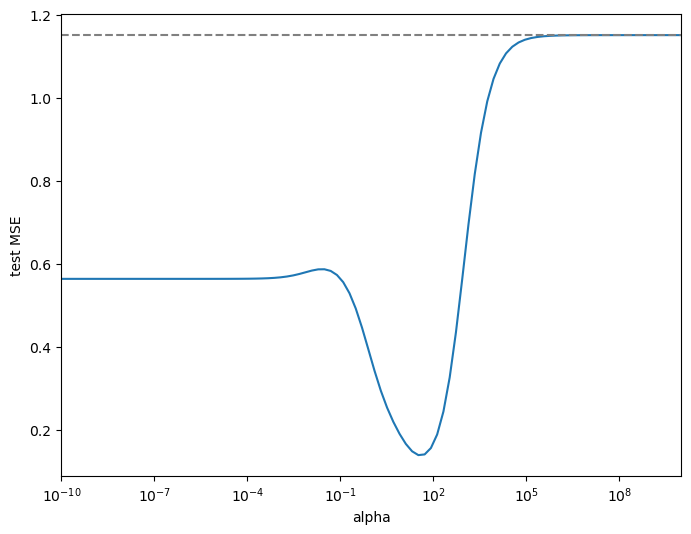

{'alpha': 32.745491628777316}
alpha in our course: 10347.575354693632


In [ ]:
model = Ridge()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(X_scaled, y_scaled)

scores = -clf.cv_results_['mean_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

print(clf.best_params_)
print('alpha in our course:', clf.best_params_['alpha'] * 2 * len(y))

$\lambda = 10347.575354693632$